Boosting: AdaBoost, Stochastic Gradient Boosting ; SVM

In [1]:
# importing needed libraries
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# reading data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [3]:
# Check the database we read and the array we created
print(dataframe.head())
print(X)
print(Y)

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

### Boosting Algorithms
Boosting ensemble algorithms creates a sequence of models that attempt to **correct the mistakes of the models before them** in the sequence.

Once created, the models make predictions which **may be weighted by their demonstrated accuracy** and the **results are combined** to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are: AdaBoost and Stochastic Gradient Boosting

### AdaBoost
In each iteration, AdaBoost identifies miss-classified data points, increasing their weights (and decrease the weights of correct points, in a sense) so that the next classifier will pay extra attention to get them right.

AdaBoost trains a sequence of models with augmented sample weights, generating ‘confidence’ coefficients Alpha for individual classifiers based on errors. Low errors leads to large Alpha, which means higher importance in the voting.


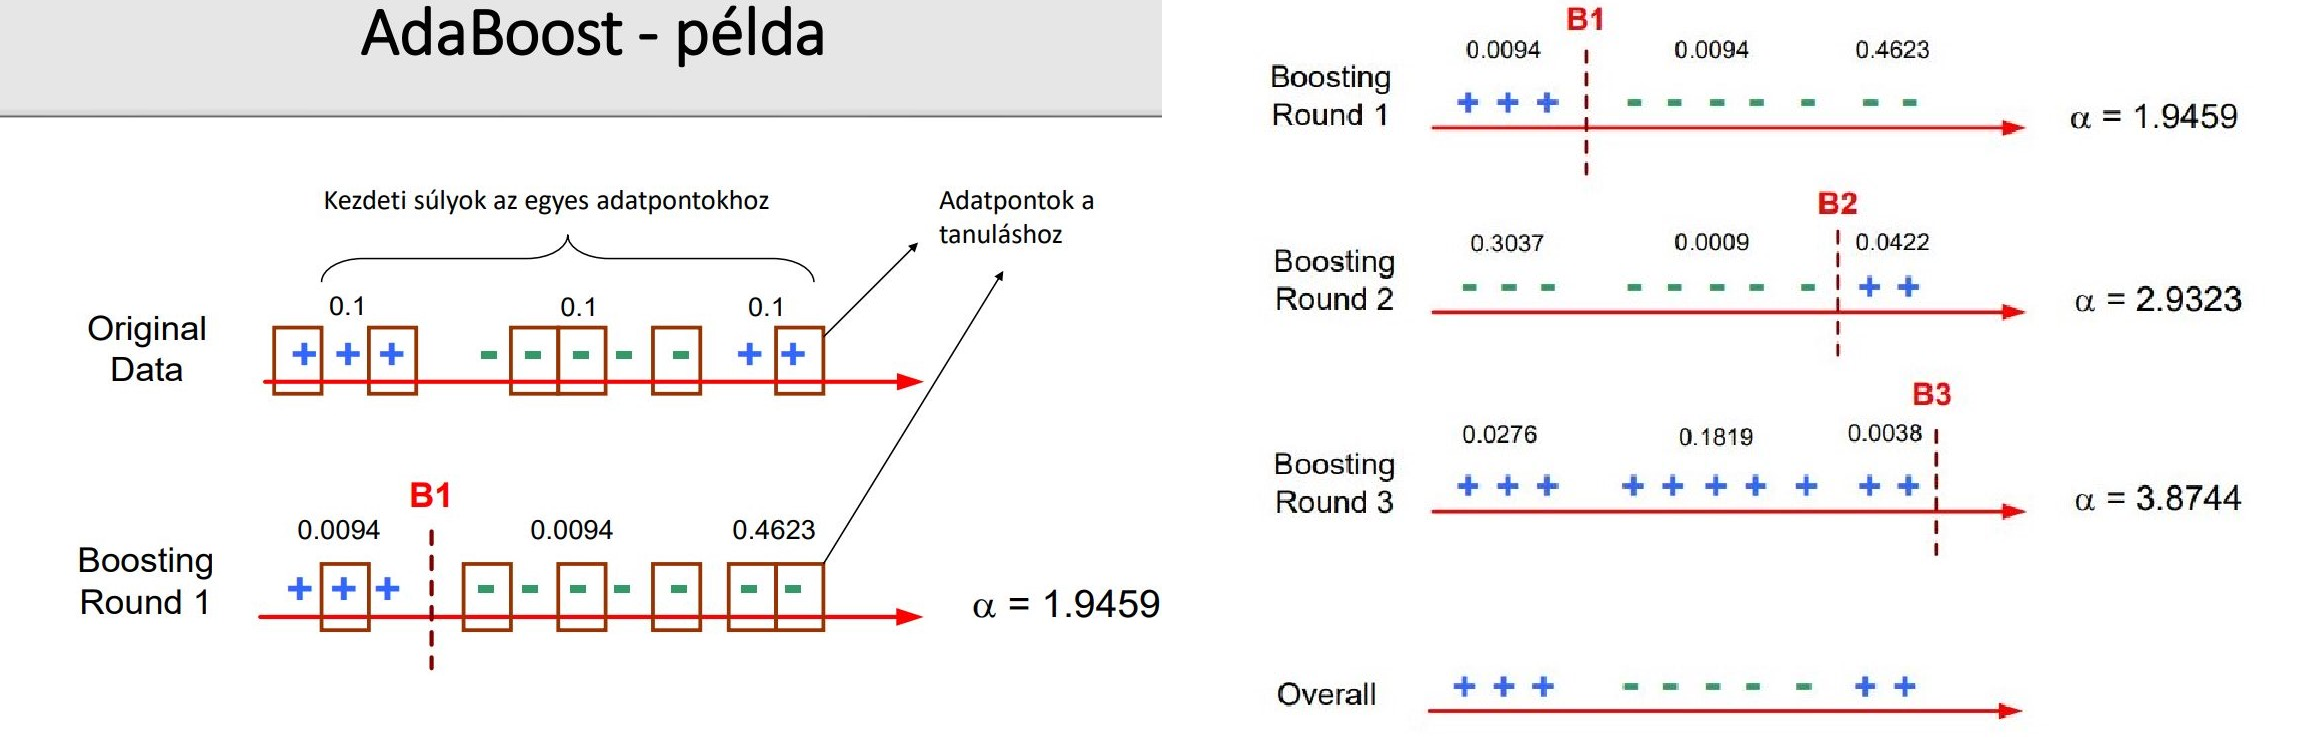

In [24]:
from IPython.display import Image
Image("img/ada.png",width=1200)


### Gradient Boosting
Gradient boosting approaches the problem a bit differently. Instead of adjusting weights of data points, Gradient boosting focuses on the difference between the prediction and the ground truth.

Gradient boosting requires a differential loss function and works for both regression and classifications. I’ll use a simple Least Square as the loss function (for regression).

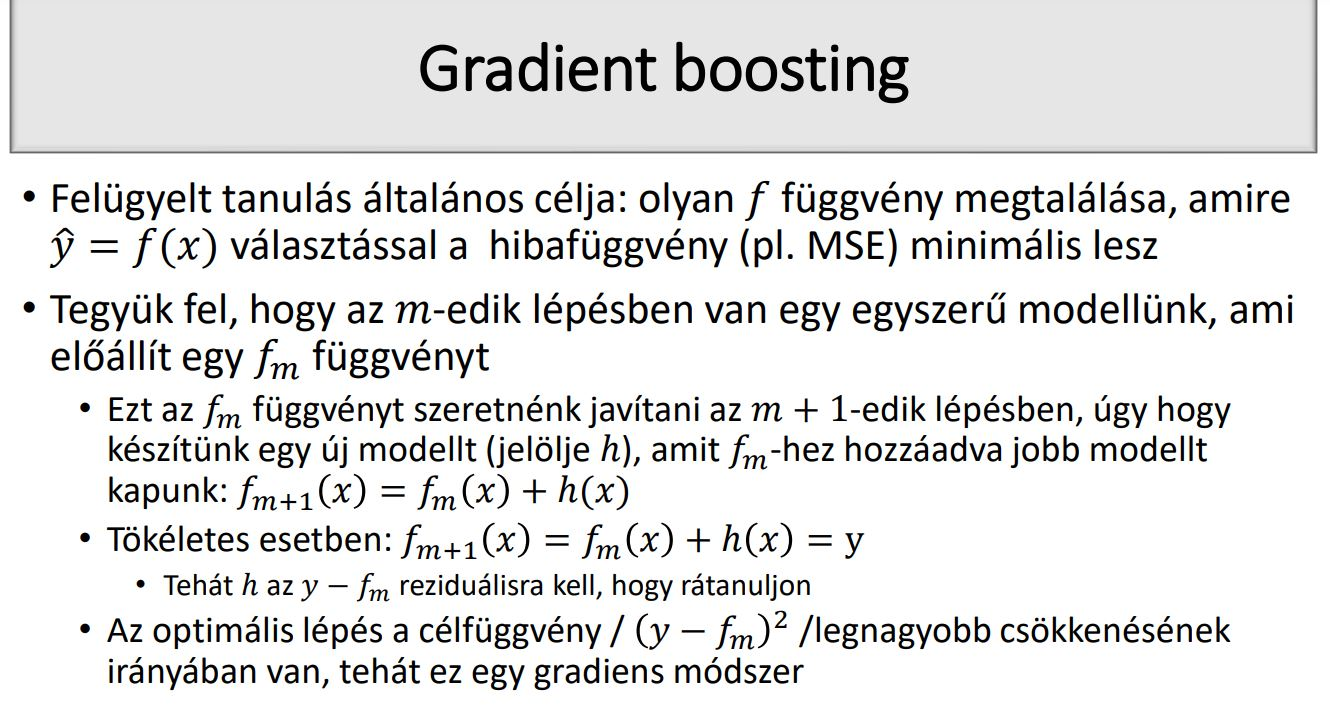

In [25]:
Image("img/grad.JPG",width=800)

#### 1. AdaBoost
AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay more or less attention to them in the construction of subsequent models.

You can construct an AdaBoost model for classification using the AdaBoostClassifier class.

The example below demonstrates the construction of 30 decision trees in sequence using the AdaBoost algorithm.

In [18]:
# Create the AdaBoost model by using AdaBoostClassifier: model
# Set a random state
# Use 30 decision trees
from sklearn import ensemble
# base_estimator alapból DCT-t használ 1-es mélységgel: base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3)
model = ensemble.AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3)
    ,n_estimators=30, random_state=69)


# Evaulate the model using the 10-fold cross validation: results
results = model_selection.cross_val_score(model, X, Y, cv=10) # scoring='f1'-nél csak 54% volt kb

# Print the mean of the 10 results
print('Pontosság cross_val:', results.mean())

Pontosság cross_val: 0.7070232399179768


In [19]:
# Check what result you get without cross-validation
# Fit your model on the training dataset and evaluate it
from sklearn import metrics

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('Pontosság accuracy_score:', metrics.accuracy_score(Y_test, Y_pred))


Pontosság accuracy_score: 0.7395833333333334


#### 2. Stochastic Gradient Boosting
Stochastic Gradient Boosting is one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps of the the best techniques available for improving performance via ensembles.

You can construct a Gradient Boosting model for classification using the GradientBoostingClassifier class.

The example below demonstrates Stochastic Gradient Boosting for classification with 100 trees.

In [22]:
# Create the GradientBoosting model by using GradientBoostingClassifier: model
# Use the same random_state as in the above model
# Use 100 decision trees
model = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=69)

# Evaulate the model using the 10-fold cross validation: results
results = model_selection.cross_val_score(model, X, Y, cv=10)

# Print the mean of the 10 results
print('Pontosság cross_val:',results.mean())

# Check what result you get without cross-validation
# Fit your model on the training dataset and evaluate it
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('Pontosság accuracy_score:',metrics.accuracy_score(Y_test, Y_pred))
print('Pontosság score:',model.score(X_test, Y_test))

Pontosság cross_val: 0.7617053998632947
Pontosság accuracy_score: 0.71875
Pontosság score: 0.71875


### Voting Ensemble
Voting is one of the simplest ways of combining the predictions from **multiple machine learning algorithms**.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from submodels, but this is called stacking (stacked generalization) and is currently not provided in scikit-learn.

You can create a voting ensemble model for classification using the VotingClassifier class.

The code below provides an example of **combining** the predictions of **logistic regression**, **decision trees** and **support vector machines** together for a classification problem.



In [25]:
# Import the needed libraries for logistic regression, SVC and Voting classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Create a list for the submodels: estimators
estimators = []

# Create a logistic regression model: model1
model1 = LogisticRegression(solver='newton-cg',random_state=69)

# Append model1 to the estimators list in format ('logistic', model1)
estimators.append(('logistic', model1))

# Create a decision tree model: model2
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=69)

# Append model1 to the estimators list in format ('decision_tree', model2)
estimators.append(('decision_tree', model1))

# Create an SVC model: model3
model3 = SVC(gamma='auto')

# Append model1 to the estimators list in format ('svm', model3)
estimators.append(('svm', model3))

# Create the ensemble model from the estimators by VotingClassifier: ensemble 
ensembleVC = VotingClassifier(estimators=estimators) # Csak tuple formátumot fogad el

# Evaulate the model using the 10-fold cross validation: results
results = model_selection.cross_val_score(ensembleVC, X, Y, cv=10)

# Print the mean of the 10 results
print('Pontosság cross_val:',results.mean())

# Check what result you get without cross-validation
# Fit your model on the training dataset and evaluate it
ensembleVC.fit(X_train, Y_train)
print('Pontosság score:',model.score(X_test, Y_test))


Pontosság cross_val: 0.7734791524265209
Pontosság score: 0.71875


### SVM
SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition.

Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

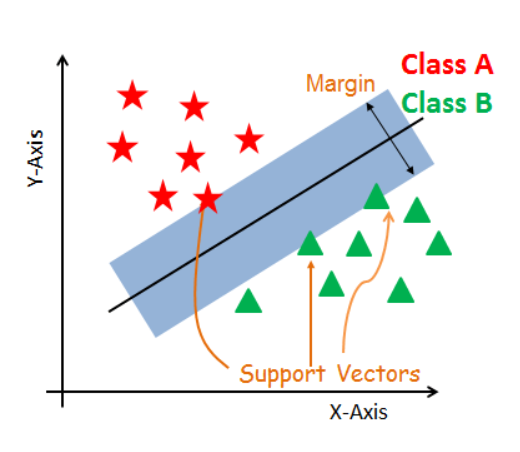

In [30]:
from IPython.display import Image
Image("img/svm.png",width=300)

#### Support Vectors
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

#### Hyperplane
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

#### Margin
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

#### How does SVM work?
The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

1. Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

2. Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.



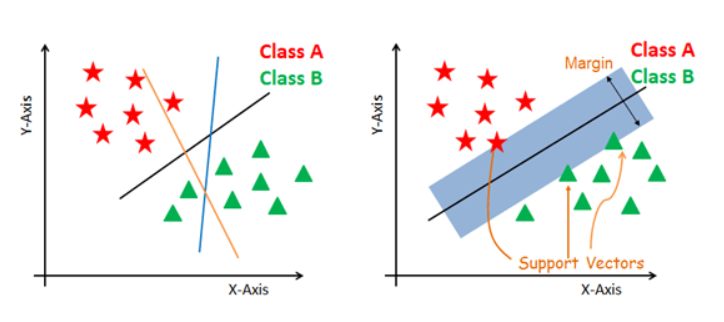

In [31]:
Image("img/svm2.png",width=600)

#### Dealing with non-linear and inseparable planes
Some problems can’t be solved using linear hyperplane, as shown in the figure below (left-hand side).

In such situation, SVM uses a kernel trick to transform the input space to a higher dimensional space as shown on the right. The data points are plotted on the x-axis and z-axis (Z is the squared sum of both x and y: z=x^2+y^2). Now you can easily segregate these points using linear separation.

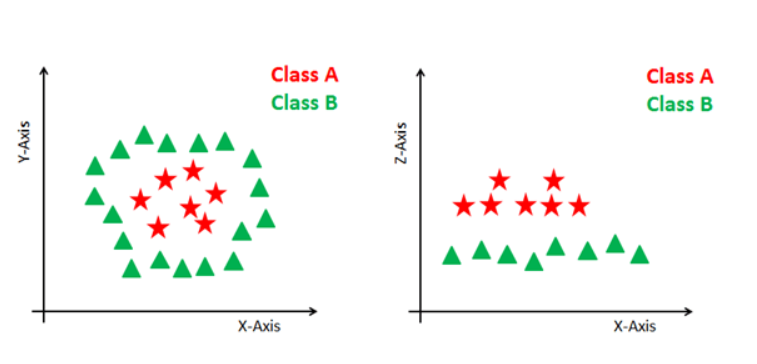

In [32]:
Image("img/svm3.png",width=600)

### Exercise

In [27]:
# Load the built-in breast_cancer dataset: cancer
from sklearn import datasets
cancer = datasets.load_breast_cancer()

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [36]:
# print the names of the 13 features
print('Features labels:', cancer.feature_names)

# print the label type of cancer
print('Target labels:', cancer.target_names)


Features labels: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target labels: ['malignant' 'benign']


In [37]:
# print the cancer data features (top 3 records)
print('Első 3 feature sor:', cancer.data[:3])

Első 3 feature sor: [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]


In [43]:
# print the cancer labels (0:malignant, 1:benign)
print('Összes target sor:', cancer.target)


Összes target sor: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1

In [44]:
# Split dataset into training set and test set
X = cancer.data
Y = cancer.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)


In [45]:
# Create a svm Classifier: clf
# Use linear kernel
clf = SVC(kernel='linear', gamma='auto', random_state=69)


# Train (fit) the model using the training sets
clf.fit(X_train, Y_train)

# Predict the response for test dataset
Y_pred = clf.predict(X_test)

In [46]:
# Model Accuracy: how often is the classifier correct?
print('Pontosság accuracy_score:', metrics.accuracy_score(Y_test, Y_pred))


Pontosság accuracy_score: 0.9385964912280702


In [48]:
# Model Precision: what percentage of positive predictions are truly positive?
print('Pontosság precision_score:', metrics.precision_score(Y_test, Y_pred))

# Model Recall: what percentage of positive datapoints are labelled as such?
print('Pontosság recall_score:', metrics.recall_score(Y_test, Y_pred))


Pontosság precision_score: 0.9206349206349206
Pontosság recall_score: 0.9666666666666667


#### Tuning Hyperparameters
* **Kernel:** The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.
* **Regularization:** Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.
* **Gamma:** A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

In [50]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']}


# Check how the function GridSearchCV works
# Use it with estimator SVC and with the above-given param_grid
# Set the verbose parameter to at least 1
grid = model_selection.GridSearchCV(SVC(), param_grid, verbose=1)

# Fit the created grid model on your train data
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [52]:
# Print best parameter after tuning 
# (your created grid model has a function named best_params_)
print('Legjobb paraméter:',grid.best_params_)

# Print how our model looks after hyper-parameter tuning
# (check the best_estimator_ function)


Legjobb paraméter: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}


In [56]:
# Predict with the help of your new model: grid_predictions
# As usual, this model also has a 'predict' function
grid_predictions = SVC(kernel='rbf', C=1, gamma=0.0001)
grid_predictions.fit(X_train, Y_train)
Y_pred = grid_predictions.predict(X_test)
print('Predictek:', Y_pred)


Predictek: [0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1
 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0
 1 1 1]


In [58]:
# Evaluate your model: print its accuracy, precision and recall values
print('Pontosság accuracy_score', metrics.accuracy_score(Y_test, Y_pred))
print('Pontosság precision_score', metrics.precision_score(Y_test, Y_pred))
print('Pontosság recall_score', metrics.recall_score(Y_test, Y_pred))



Pontosság accuracy_score 0.9210526315789473
Pontosság precision_score 0.9047619047619048
Pontosság recall_score 0.95
